# Happiness study

We wanted to know the reasons that make people happy all arround the world. <br/>
Based on the World Happiness Report, we mainly focused on the year 2015. <br/>
Then we wanted to see if those reasons were related to suicides and terrorism acts.

# Loading datas into Hive

In [1]:
#pip install pygal_maps_world & conda install -c conda-forge pyhamcrest  & pip install cairosvg & pycountry
import pandas as pd
from pyhive import hive
#Heat map
import seaborn as sns 
#Linear regression
import statsmodels.api as sm

import pygal.maps.world as pymap
import pycountry

In [2]:
cursor = hive.connect('localhost').cursor()
cursor.execute('drop database if exists pjHive cascade')
cursor.execute('create database if not exists pjHive')
cursor.execute('use pjHive')

In [3]:
# Happiness (3 different tables because we don't have the same datas for each year)
cursor.execute('drop table if exists happiness2015')
cursor.execute("create table if not exists happiness2015 (Country string,Region string,Happiness_Rank int,Happiness_Score float,Standard_Error float,GDP_Per_Capita float,Family float,Life_Expectancy float,Freedom float,Government_Corruption float,Generosity float,Dystopia_Residual float) "\
               +"row format delimited fields terminated by ',' "\
               +"stored as textfile "\
               +"tblproperties('skip.header.line.count'='1')");
cursor.execute("load data local inpath '/home/cloudera/Desktop/pjHive/2015.csv' into table happiness2015")

cursor.execute('drop table if exists happiness2016')
cursor.execute("create table if not exists happiness2016 (Country string,Region string,Happiness_Rank int,Happiness_Score float,Lower_Confidence_Interval float,Upper_Confidence_Interval float,GDP_per_Capita float,Family float,Life_Expectancy float,Freedom float,Government_Corruption float,Generosity float,Dystopia_Residual float) "\
               +"row format delimited fields terminated by ',' "\
               +"stored as textfile "\
               +"tblproperties('skip.header.line.count'='1')");
cursor.execute("load data local inpath '/home/cloudera/Desktop/pjHive/2016.csv' into table happiness2016")

cursor.execute('drop table if exists happiness2017')
cursor.execute("create table if not exists happiness2017 (Country string,Happiness_Rank int ,Happiness_Score float,Whisker_high float,Whisker_low float,GDP_per_Capita float,Family float,Life_Expectancy float,Freedom float,Generosity float,Government_Corruption float,Dystopia_Residual float) "\
               +"row format delimited fields terminated by ',' "\
               +"stored as textfile "\
               +"tblproperties('skip.header.line.count'='1')");
cursor.execute("load data local inpath '/home/cloudera/Desktop/pjHive/2017.csv' into table happiness2017")


#Terrorism
cursor.execute('drop table if exists terrorism')
cursor.execute("create table if not exists terrorism (eventid string,iyear string,imonth string,iday string,approxdate string,extend string,resolution string,country string,country_txt string,region string,region_txt string,provstate string,city string,latitude string,longitude string,specificity string,vicinity string,location string,summary string,crit1 string,crit2 string,crit3 string,doubtterr string,alternative string,alternative_txt string,multiple string,success string,suicide string,attacktype1 string,attacktype1_txt string,attacktype2 string,attacktype2_txt string,attacktype3 string,attacktype3_txt string,targtype1 string,targtype1_txt string,targsubtype1 string,targsubtype1_txt string,corp1 string,target1 string,natlty1 string,natlty1_txt string,targtype2 string,targtype2_txt string,targsubtype2 string,targsubtype2_txt string,corp2 string,target2 string,natlty2 string,natlty2_txt string,targtype3 string,targtype3_txt string,targsubtype3 string,targsubtype3_txt string,corp3 string,target3 string,natlty3 string,natlty3_txt string,gname string,gsubname string,gname2 string,gsubname2 string,gname3 string,gsubname3 string,motive string,guncertain1 string,guncertain2 string,guncertain3 string,individual string,nperps string,nperpcap string,claimed string,claimmode string,claimmode_txt string,claim2 string,claimmode2 string,claimmode2_txt string,claim3 string,claimmode3 string,claimmode3_txt string,compclaim string,weaptype1 string,weaptype1_txt string,weapsubtype1 string,weapsubtype1_txt string,weaptype2 string,weaptype2_txt string,weapsubtype2 string,weapsubtype2_txt string,weaptype3 string,weaptype3_txt string,weapsubtype3 string,weapsubtype3_txt string,weaptype4 string,weaptype4_txt string,weapsubtype4 string,weapsubtype4_txt string,weapdetail string,nkill string,nkillus string,nkillter string,nwound string,nwoundus string,nwoundte string,property string,propextent string,propextent_txt string,propvalue string,propcomment string,ishostkid string,nhostkid string,nhostkidus string,nhours string,ndays string,divert string,kidhijcountry string,ransom string,ransomamt string,ransomamtus string,ransompaid string,ransompaidus string,ransomnote string,hostkidoutcome string,hostkidoutcome_txt string,nreleased string,addnotes string,scite1 string,scite2 string,scite3 string,dbsource string,INT_LOG string,INT_IDEO string,INT_MISC string,INT_ANY string,related string) "\
               +"row format delimited fields terminated by ',' "\
               +"stored as textfile "\
               +"tblproperties('skip.header.line.count'='1')");
cursor.execute("load data local inpath '/home/cloudera/Desktop/pjHive/terrorism.csv' into table terrorism")

#Suicide

cursor.execute('drop table if exists suicide')
cursor.execute("create table if not exists suicide (Country string, Sex string, y_2016 float, y_2015 float, y_2010 float, y_2000 float) "\
               +"row format delimited fields terminated by ',' "\
               +"stored as textfile "\
               +"tblproperties('skip.header.line.count'='1')");
cursor.execute("load data local inpath '/home/cloudera/Desktop/pjHive/data.csv' into table suicide")

cursor.execute('drop table if exists population')
cursor.execute("create table if not exists population (CountryName string ,CountryCode string,IndicatorName string,IndicatorCode string,y1960 int,y1961 bigint,y1962 bigint,y1963 bigint,y1964 bigint,y1965 bigint,y1966 bigint,y1967 bigint,y1968 bigint,y1969 bigint,y1970 bigint,y1971 bigint,y1972 bigint,y1973 bigint,y1974 bigint,y1975 bigint,y1976 bigint,y1977 bigint,y1978 bigint,y1979 bigint,y1980 bigint,y1981 bigint,y1982 bigint,y1983 bigint,y1984 bigint,y1985 bigint,y1986 bigint,y1987 bigint,y1988 bigint,y1989 bigint,y1990 bigint,y1991 bigint,y1992 bigint,y1993 bigint,y1994 bigint,y1995 bigint,y1996 bigint,y1997 bigint,y1998 bigint,y1999 bigint,y2000 bigint,y2001 bigint,y2002 bigint,y2003 bigint,y2004 bigint,y2005 bigint,y2006 bigint,y2007 bigint,y2008 bigint,y2009 bigint,y2010 bigint,y2011 bigint,y2012 bigint,y2013 bigint,y2014 bigint ,y2015 bigint,y2016 bigint,y2017 bigint) "\
               +"row format delimited fields terminated by ',' "\
               +"stored as textfile "\
               +"tblproperties('skip.header.line.count'='1')");
cursor.execute("load data local inpath '/home/cloudera/Desktop/pjHive/population.csv' into table population")


# Analysis

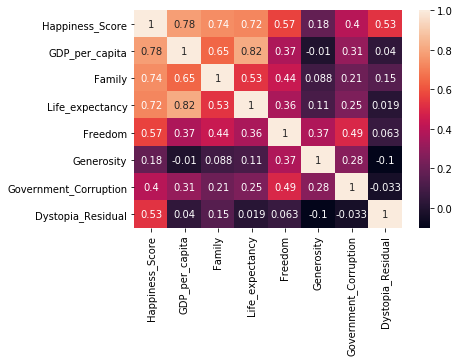

In [25]:
#Correlation between different variables
cursor.execute('select  happiness_score, gdp_per_capita, family, life_expectancy, freedom, generosity, government_corruption,dystopia_residual from happiness2015')
linearRegressionHappiness = pd.DataFrame(cursor.fetchall(),columns=['Happiness_Score', 'GDP_per_capita', 'Family', 'Life_expectancy', 'Freedom', 'Generosity', 'Government_Corruption','Dystopia_Residual'])
devcore = linearRegressionHappiness.corr()

sns.heatmap(devcore, xticklabels=linearRegressionHappiness.columns,yticklabels=linearRegressionHappiness.columns,annot=True)

# As happiness is composed by the sum of other variables, we have a strong link between it and other variables.
# Moreover, we can see correlation between variables such as Life_expectancy and Economy (GDP_per_capita) or Family and Life_expectancy
# That means that the higher GDP_per_capita is, higher life_expectancy will be.
# BUT those variables don't contribute as much in the happiness calculation. Let's see how they contribute for each region

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f728eed1080>,
      dtype=object)

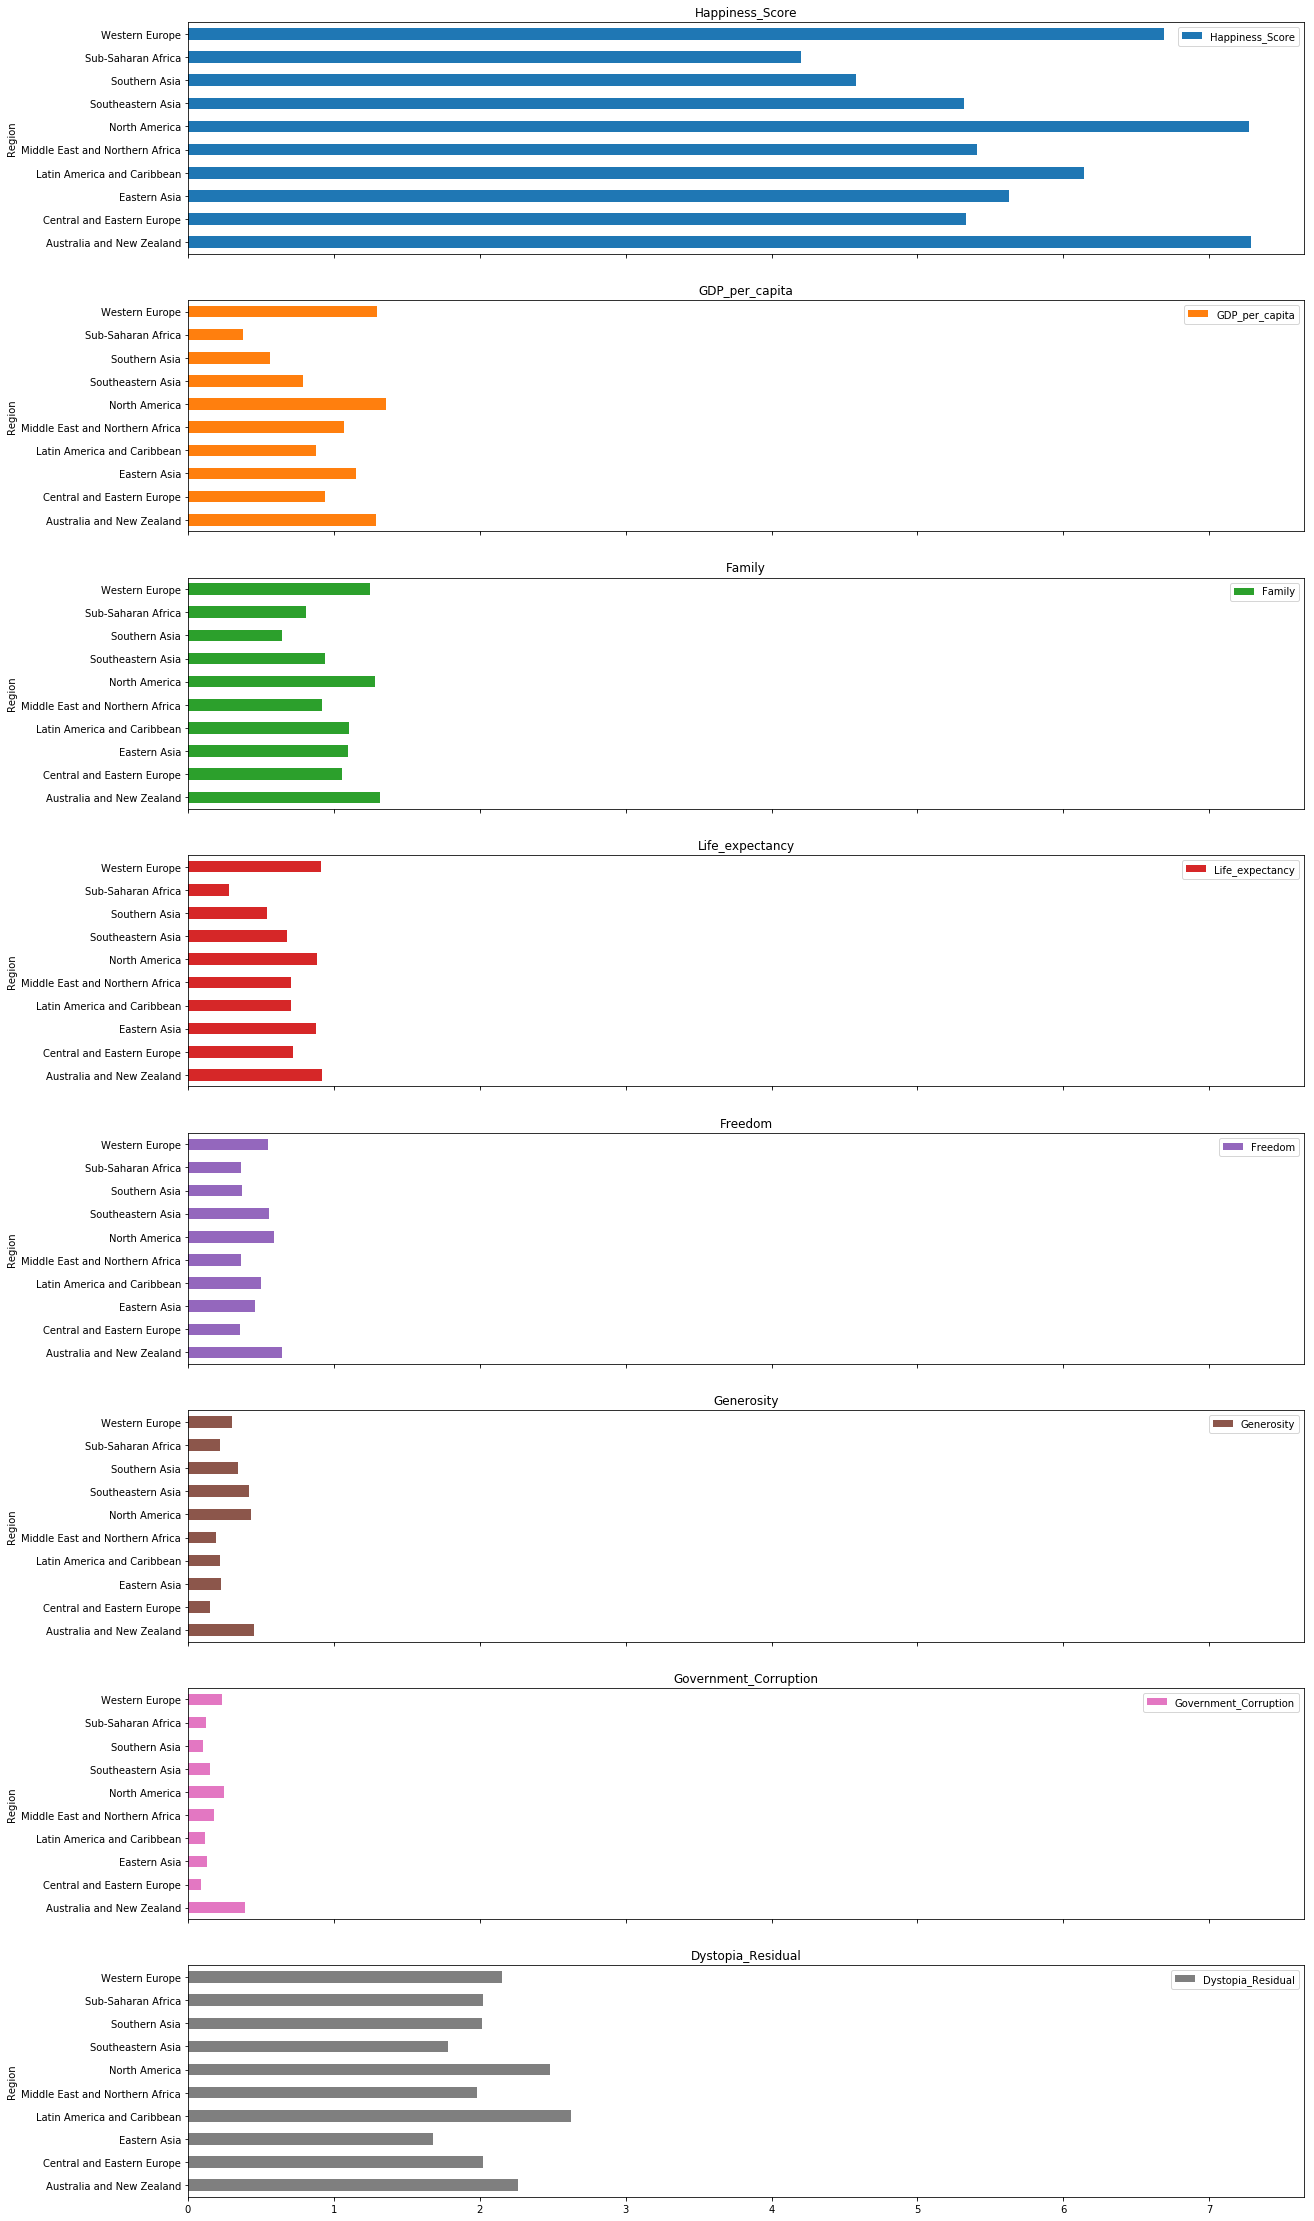

In [5]:
# Avg value of variables per region
cursor.execute('select Country, Region,Happiness_Score,GDP_per_capita, Family, Life_expectancy, Freedom, Generosity, Government_Corruption,Dystopia_Residual from happiness2015')
rows = pd.DataFrame(cursor.fetchall(),columns=['Country', 'Region','Happiness_Score','GDP_per_capita', 'Family', 'Life_expectancy', 'Freedom', 'Generosity', 'Government_Corruption','Dystopia_Residual'])

rows = rows.groupby(["Region"]).mean()#.hist(by='Region',figsize = (15,20))
rows.plot.barh(subplots = True, figsize=(20,40))

In [6]:
# Have a look on the contribution of each variables to the happiness_score
cursor.execute('select h.country, h.region, h.happiness_score, h.gdp_per_capita, h.family, h.life_expectancy, h.freedom, h.generosity, h.government_corruption, h.dystopia_residual '\
                +'from happiness2015 h ')
variablesContribution = pd.DataFrame(cursor.fetchall(), columns = ['country', 'region',  'happiness_score', 'gdp_per_capita', 'family', 'life_expectancy', 'freedom', 'generosity', 'government_corruption', 'dystopia_residual'])

for i in variablesContribution.columns[4:]:
    variablesContribution[i] = variablesContribution[i].divide(variablesContribution["happiness_score"])*100
variablesContribution.sort_values(by = 'gdp_per_capita')

,country,region,happiness_score,gdp_per_capita,family,life_expectancy,freedom,generosity,government_corruption,dystopia_residual
119,Congo (Kinshasa),Sub-Saharan Africa,4.517,0.00000,22.165152,2.170910,5.004428,5.497896,1.688067,63.473985
156,Burundi,Sub-Saharan Africa,2.905,0.01530,14.315663,7.709466,4.079174,6.790706,3.463683,63.098795
130,Malawi,Sub-Saharan Africa,4.292,0.01604,9.583877,5.256757,10.031221,7.718546,1.625583,65.421950
143,Niger,Sub-Saharan Africa,3.845,0.06940,20.094928,7.726138,12.403641,5.042132,4.067360,48.862678
115,Liberia,Sub-Saharan Africa,4.571,0.07120,17.275869,7.482170,6.241741,5.329687,1.363378,60.758916
147,Central African Republic,Sub-Saharan Africa,3.678,0.07850,0.000000,1.821370,13.289560,6.480424,2.253670,74.015771
93,Mozambique,Sub-Saharan Africa,4.971,0.08308,20.644940,1.836854,6.847113,4.479783,3.138805,61.383420
149,Guinea,Sub-Saharan Africa,3.656,0.17417,12.711980,6.567013,10.318654,7.838348,3.320295,54.478119
90,Somaliland region,Sub-Saharan Africa,5.057,0.18847,18.815899,8.675697,9.211390,9.950168,7.895590,41.730671
121,Ethiopia,Sub-Saharan Africa,4.512,0.19073,13.387854,9.763963,9.629876,5.391179,3.335106,54.272163


### Relation with terrorism

Let's see if terrorism and happiness are related.

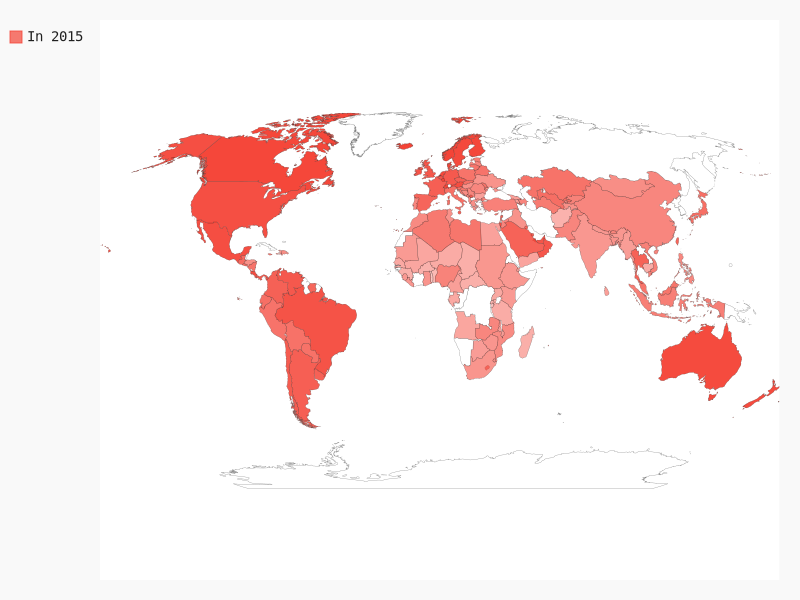

In [7]:
# First let's have a view on map of happiness_score and terrorist attack number

# Map with happiness_score
worldmap_chart_happiness = pymap.World()
cursor.execute('select country, happiness_score from happiness2015')
rows = pd.DataFrame(cursor.fetchall(),columns=['country','happiness_score'])
def transform(x):
    try:
        return pycountry.countries.lookup(x).alpha_2.lower()
    except :
        return x

rows["country"] = rows["country"].apply(lambda x:transform(x))
worldmap_chart_happiness.add('In 2015', rows.set_index(["country"])["happiness_score"].to_dict())
worldmap_chart_happiness

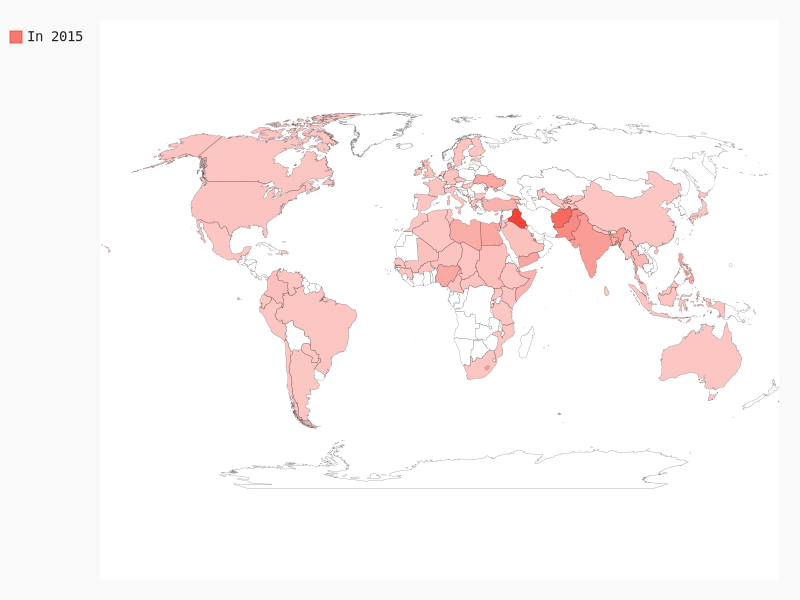

In [8]:
# Map with terrorist attacks
cursor.execute('select iyear, country_txt, region_txt, gname, nkill from terrorism')
terrorism = pd.DataFrame(cursor.fetchall(),columns=['iyear','country_txt','region_txt','gname','nkill'])

terrorism["country_txt"] = terrorism["country_txt"].apply(lambda x:transform(x))
terrorism.loc[terrorism["iyear"] == "2015"].groupby("country_txt")["nkill"].count()

#Repartition of terrorist attack arround the world
worldmap_chart_terrorism = pymap.World()
worldmap_chart_terrorism.add('In 2015', terrorism.loc[terrorism["iyear"] == "2015"].groupby("country_txt")["nkill"].count().to_dict())
worldmap_chart_terrorism

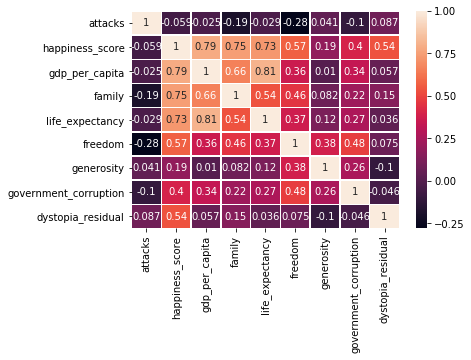

In [9]:
#Looks like, the lower happiness score you have, higher will be your terrorist attack number
#Heatmap to see links between nb of attacks and different variables of happiness table
cursor.execute('select h.country, h.region, t.count,  h.happiness_score, h.gdp_per_capita, h.family, h.life_expectancy, h.freedom, h.generosity, h.government_corruption, h.dystopia_residual '\
                +'from happiness2015 h '\
                +'join (Select country_txt as country, count(*) as count from terrorism group by country_txt) t on t.country = h.country')
terrorismHappiness = pd.DataFrame(cursor.fetchall(), columns = ['country', 'region', 'attacks',  'happiness_score', 'gdp_per_capita', 'family', 'life_expectancy', 'freedom', 'generosity', 'government_corruption', 'dystopia_residual'])
devcore = terrorismHappiness.corr()
sns.heatmap(devcore, xticklabels=terrorismHappiness.columns[2:],yticklabels=terrorismHappiness.columns[2:],annot=True, linewidths=.5)

### Suicide

Our principal dataset is about the happiness in the world. <br/>
So we thought that suicide and the hapiness of the population might be related in some way. <br/>
We will see if it's true or not.<br/>
In the suicide dataset we took only the year 2015. 
It contains the countries, the number of suicides in the country per year.

In [10]:
# We display the 5 countries affected by the most numbers of suicide
cursor.execute('select s.Country, (s.y_2015 * population.y2015)/100000 , h2015.Happiness_Score, h2015.gdp_per_capita, h2015.family, h2015.life_expectancy, h2015.freedom, h2015.generosity, h2015.government_corruption,h2015.dystopia_residual from suicide s inner join happiness2015 h2015 on s.Country = h2015.Country inner join population on s.Country = population.CountryName where s.Sex="Both sexes"  ')
suicideRows = pd.DataFrame(cursor.fetchall(),columns=['country','suicide', 'Happiness_Score', 'GDP_per_capita', 'Family', 'Life_expectancy', 'Freedom', 'Generosity', 'Government_Corruption','Dystopia_Residual'])

suicideRows.nlargest(5, 'suicide')

,country,suicide,Happiness_Score,GDP_per_capita,Family,Life_expectancy,Freedom,Generosity,Government_Corruption,Dystopia_Residual
54,India,216074.52672,4.565,0.64499,0.38174,0.51529,0.39786,0.26475,0.08492,2.27513
25,China,110505.87136,5.140,0.89012,0.94675,0.81658,0.51697,0.08185,0.02781,1.86040
89,Nigeria,30880.58624,5.268,0.65435,0.90432,0.16007,0.34334,0.27233,0.04030,2.89319
62,Japan,19218.67648,5.987,1.27074,1.25712,0.99111,0.49615,0.10705,0.18060,1.68435
18,Brazil,12661.21344,6.983,0.98124,1.23287,0.69702,0.49049,0.14574,0.17521,3.26001


In [11]:
# Percentage of suicides per country to see globaly
cursor.execute('select s.Country, (((s.y_2015 * population.y2015)/100000)/ population.y2015)*100 from suicide s inner join population on s.Country = population.CountryName where s.Sex="Both sexes" ')
Suicidetest = pd.DataFrame(cursor.fetchall(),columns=['Country', 'suicidePercentage'])
Suicidetest.nlargest(20, 'suicidePercentage')

,Country,suicidePercentage
64,Guyana,0.0303
89,Lithuania,0.0288
88,Lesotho,0.0285
125,Russian Federation,0.0275
79,Kazakhstan,0.0252
138,Suriname,0.0244
60,Equatorial Guinea,0.0220
19,Belarus,0.0212
154,Uganda,0.0202
31,Cameroon,0.0196


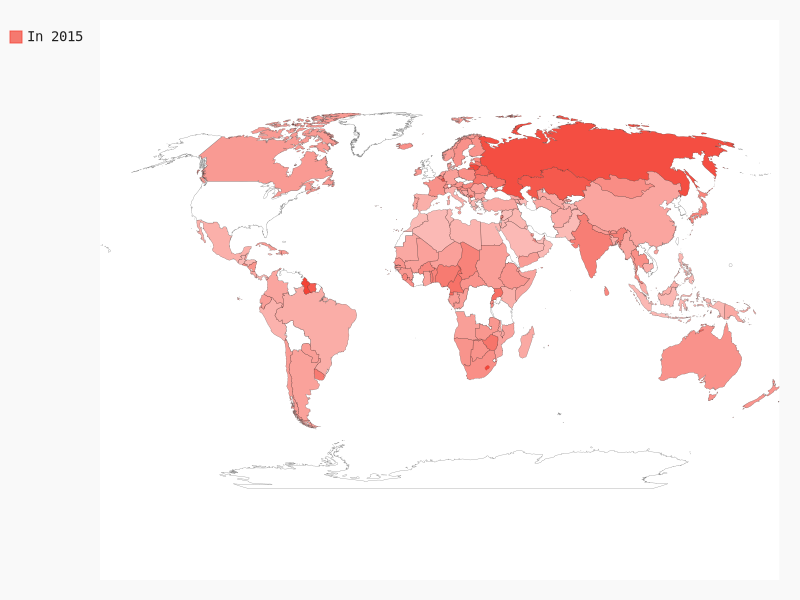

In [12]:
# We represent this percentage in the world map for better view of the situation
cursor.execute('select s.Country, (((s.y_2015 * population.y2015)/100000)/ population.y2015)*100 from suicide s inner join population on s.Country = population.CountryName where s.Sex="Both sexes" ')
Suicide = pd.DataFrame(cursor.fetchall(),columns=['Country', 'y_2015'])

Suicide["Country"] =Suicide["Country"].apply(lambda x:transform(x))

#Repartition of suicide arround the world
worldmap_chart_terrorism = pymap.World()
worldmap_chart_terrorism.add('In 2015',  Suicide.set_index(["Country"])["y_2015"].to_dict())

In [13]:
# We calculate the average percentage of suicide in the world 
cursor.execute('select AVG((((s.y_2015 * population.y2015)/100000)/ population.y2015)*100) from suicide s inner join population on s.Country = population.CountryName where s.Sex="Both sexes" ')
avgSuicide = pd.DataFrame(cursor.fetchall(),columns=['Suicide'])
avgSuicide

,Suicide
0,0.009734


In [14]:
# We compared the 8 countries with the largest GDP per capita with the average suicide in the world
cursor.execute('select s.Country, (((s.y_2015 * population.y2015)/100000)/ population.y2015)*100 , h2015.Happiness_Score, (h2015.gdp_per_capita/h2015.Happiness_Score)*100, (h2015.family/h2015.Happiness_Score)*100, (h2015.life_expectancy/h2015.Happiness_Score)*100, (h2015.freedom/h2015.Happiness_Score)*100, (h2015.generosity/h2015.Happiness_Score)*100, (h2015.government_corruption/h2015.Happiness_Score)*100,(h2015.dystopia_residual/h2015.Happiness_Score)*100 from suicide s inner join happiness2015 h2015 on s.Country = h2015.Country inner join population on s.Country = population.CountryName where s.Sex="Both sexes"  ')

Suicidetest = pd.DataFrame(cursor.fetchall(),columns=['Country','Suicide', 'Happiness_Score', 'GDP_per_capita', 'Family', 'Life_expectancy', 'Freedom', 'Generosity', 'Government_Corruption','Dystopia_Residual'])
Suicidetest.nlargest(8, 'GDP_per_capita')

,Country,Suicide,Happiness_Score,GDP_per_capita,Family,Life_expectancy,Freedom,Generosity,Government_Corruption,Dystopia_Residual
43,Gabon,0.0099,3.896,27.213554,23.236140,11.132444,8.191478,1.751027,2.846766,25.640401
103,Qatar,0.0057,6.611,25.569808,16.315233,12.060657,9.686885,4.927091,7.897141,23.547724
66,Kuwait,0.0022,6.295,24.689753,18.521684,11.515806,8.816362,2.577919,4.068149,29.806831
14,Bulgaria,0.0079,4.218,23.996206,26.224278,18.171882,7.251541,2.826221,0.206733,21.334993
47,Greece,0.0036,4.857,23.760758,19.133828,18.162035,1.585135,0.000000,0.287626,37.080709
52,Hungary,0.0147,4.800,23.352915,25.044790,15.813541,6.690000,2.666667,0.574583,25.848748
20,Botswana,0.0120,4.332,22.935135,25.499540,1.102493,11.425439,2.414820,2.879501,33.744461
101,Portugal,0.0086,5.102,22.734416,22.331439,17.153861,10.088004,2.688945,0.211290,24.786748


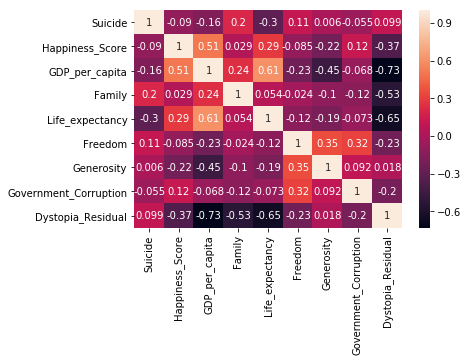

In [15]:
# Study of the correlation between the percentage of suicide and the different aspects of happiness

cursor.execute('select (((s.y_2015 * population.y2015)/100000)/ population.y2015)*100 , h2015.Happiness_Score, (h2015.gdp_per_capita/h2015.Happiness_Score)*100, (h2015.family/h2015.Happiness_Score)*100, (h2015.life_expectancy/h2015.Happiness_Score)*100, (h2015.freedom/h2015.Happiness_Score)*100, (h2015.generosity/h2015.Happiness_Score)*100, (h2015.government_corruption/h2015.Happiness_Score)*100,(h2015.dystopia_residual/h2015.Happiness_Score)*100 from suicide s inner join happiness2015 h2015 on s.Country = h2015.Country inner join population on s.Country = population.CountryName where s.Sex="Both sexes"  ')

correlationSuicide = pd.DataFrame(cursor.fetchall(),columns=['Suicide', 'Happiness_Score', 'GDP_per_capita', 'Family', 'Life_expectancy', 'Freedom', 'Generosity', 'Government_Corruption','Dystopia_Residual'])
correlationSuicide.head(10)
devcore = correlationSuicide.corr()

sns.heatmap(devcore, xticklabels=correlationSuicide.columns,yticklabels=correlationSuicide.columns,annot=True)

### Segmentation & Regressions

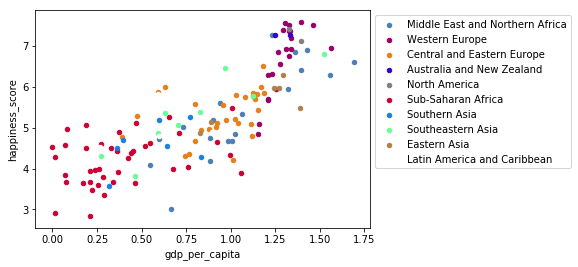

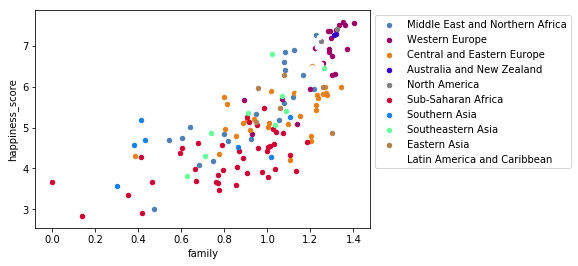

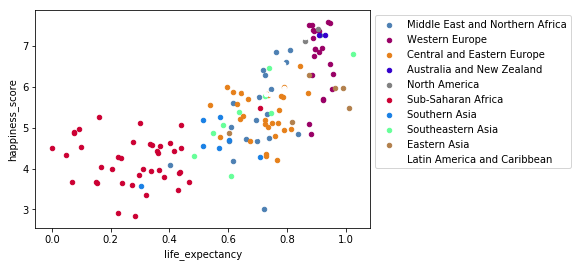

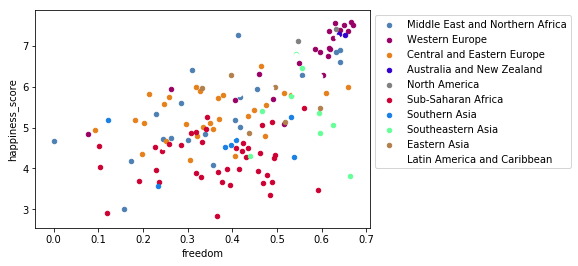

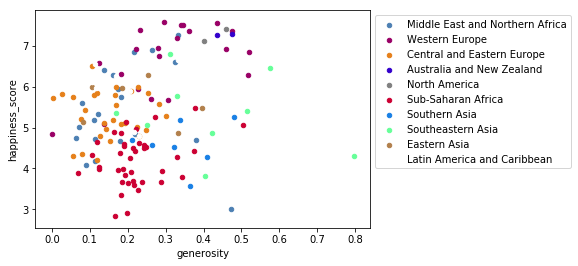

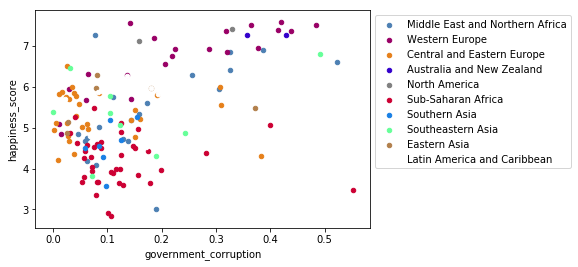

In [16]:
# Trying to see if regions are grouped according to one variable
cursor.execute('select country, region, happiness_score , gdp_per_capita, family, life_expectancy, freedom, generosity, government_corruption from happiness2015')
repartition = pd.DataFrame(cursor.fetchall(),columns=['country', 'region','happiness_score','gdp_per_capita', 'family', 'life_expectancy', 'freedom', 'generosity', 'government_corruption'])
for i in repartition.columns[3:]:
    cpt = 0
    ax = ""
    for j in set(repartition["region"]):
        cpt += 1/len(set(repartition["region"]))
        if ax:
            ax = repartition.loc[repartition["region"]==j].plot(kind='scatter', x=i, y='happiness_score', ax = ax, color=(cpt*3%1,cpt*5%1,cpt*7%1))
        else: 
            ax = repartition.loc[repartition["region"]==j].plot(kind='scatter', x=i, y='happiness_score', color=(cpt*3%1,cpt*5%1,cpt*7%1))
    ax.legend(set(repartition["region"]),bbox_to_anchor=(1.0, 1.0))

# For example, we can see that Sub-Saharian is grouped on the bottom left corner.
# Otherwise, points are to grouped to see any kind of groups

In [29]:
# Linear regression of Happiness Score regarding variables 


# (gdp_per_capita, family, life_expectancy, freedom, generosity, government_corruption)
X = linearRegression[linearRegression.columns[1:7]]
Y = linearRegression['Happiness_Score']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     87.81
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           1.04e-46
Time:                        13:57:56   Log-Likelihood:                -126.46
No. Observations:                 158   AIC:                             266.9
Df Residuals:                     151   BIC:                             288.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8602      0.190      9.766      0.000       1.484       2.237
GDP_per_capita            0.8607      0.220      3.907      0.000       0.425       1.296
Family                    1.4089      0.223      6.327      0.000       0.969       1.849
Life_expectancy           0.9753      0.316      3.084      0.002       0.350       1.600
Freedom                   1.3334      0.385      3.463      0.001       0.573       2.094
Generosity                0.3889      0.391      0.995      0.321      -0.384       1.161
Government_Corruption     0.7845      0.437      1.797      0.074      -0.078       1.647
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.324
Skew:                          -0.180   Prob(JB):                        0.516
Kurtosis:                       3.268   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:                Suicide   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4.322
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           0.000130
Time:                        13:58:59   Log-Likelihood:                 520.97
No. Observations:                 132   AIC:                            -1024.
Df Residuals:                     123   BIC:                            -998.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    22.50

/home/cloudera/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


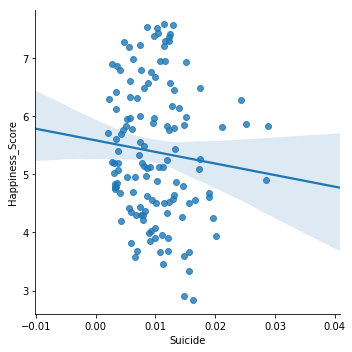

In [34]:
#Linear regression of Happiness Score regarding variables
X = Suicidetest[['Happiness_Score', 'GDP_per_capita', 'Family', 'Life_expectancy', 'Freedom', 'Generosity', 'Government_Corruption','Dystopia_Residual']]
Y = Suicidetest['Suicide']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())

sns.lmplot(x='Suicide', y='Happiness_Score', data=Suicidetest)

# Sources

Happiness: https://www.kaggle.com/unsdsn/world-happiness#2017.csv <br/>
Suicide case: https://www.kaggle.com/szamil/who-suicide-statistics <br/>
Worldwide Terrorism: https://www.kaggle.com/START-UMD/gtd <br/>
Data: http://apps.who.int/gho/data/node.main.MHSUICIDE?lang=en <br/>
Population: https://donnees.banquemondiale.org/indicateur/sp.pop.totl